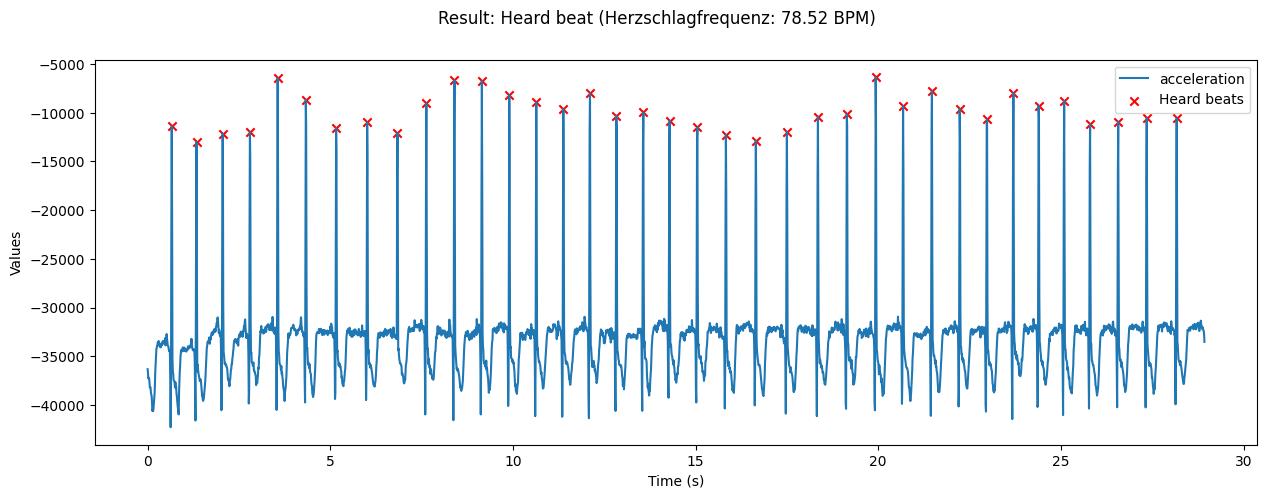

In [19]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Read file  , nrows=1000
data = pd.read_csv('v5_puls_1.csv')

# Werte aus der CSV-Datei extrahieren
d_values = -data['D']

# Künstliche Zeitreihe erstellen
time_series = np.arange(len(data)) * 0.01  # 10 Millisekunden pro Eintrag


# Peaks in der Beschleunigung finden
peaks, _ = find_peaks(d_values, height=-15000, distance=50)

# Zeitdifferenzen zwischen aufeinanderfolgenden Peaks auf der künstlichen Zeitreihe berechnen
time_diffs = np.diff(time_series[peaks])

# Herzschlagfrequenz in BPM (Beats Per Minute) berechnen
heartbeats = 60 / np.mean(time_diffs)

# Plot erstellen
fig, ax1 = plt.subplots(figsize=(15,5))
fig.suptitle(f'Result: Heard beat (Herzschlagfrequenz: {heartbeats:.2f} BPM)')

ax1.plot(time_series, d_values, label='acceleration')
ax1.scatter(time_series[peaks], d_values.iloc[peaks], c='r', marker='x', label='Heard beats')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Values')
ax1.legend()

# Diagramm anzeigen
plt.show()



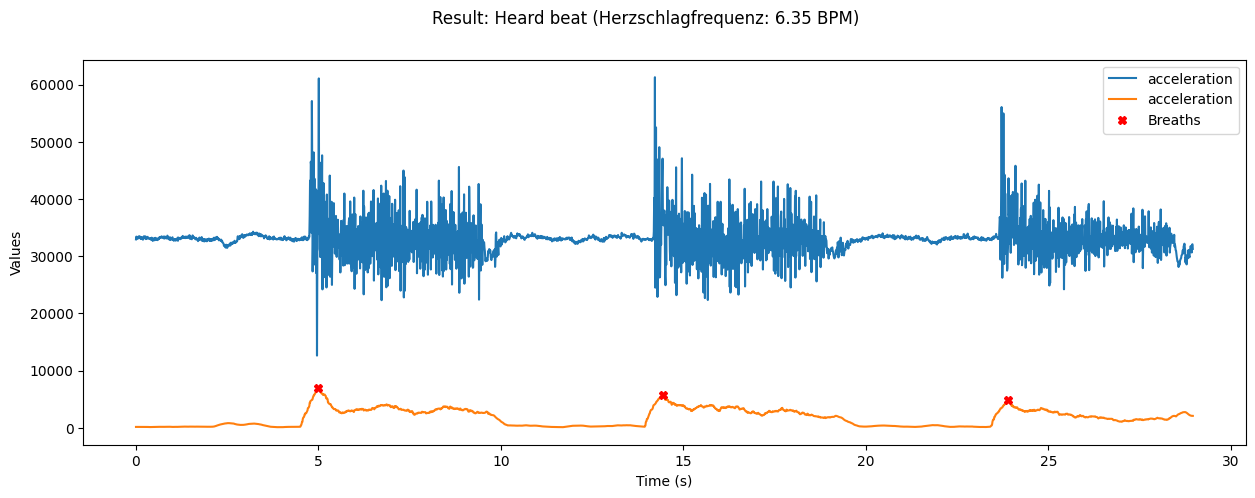

In [37]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Read file  , nrows=1000
data = pd.read_csv('v5_muskel_1.csv')

# Werte aus der CSV-Datei extrahieren
d_values = data['D']

# Künstliche Zeitreihe erstellen
time_series = np.arange(len(data)) * 0.01  # 1 Millisekunden pro Eintrag

# Beispiel für Anomalieerkennung (Schwellenwert: 2 Standardabweichungen)
mittelwert = np.mean(d_values)
diffMittel = abs(d_values - mittelwert)

sgf = signal.savgol_filter(diffMittel, window_length=50, polyorder=1, mode="nearest")
peaks, _ = find_peaks(sgf,  height=500, distance=500)

# Zeitdifferenzen zwischen aufeinanderfolgenden Peaks auf der künstlichen Zeitreihe berechnen
time_diffs = np.diff(time_series[peaks])

# Atemzüge pro Minute berechnen
breaths = 60 / np.mean(time_diffs)

# Plot erstellen
fig, ax1 = plt.subplots(figsize=(15,5))
fig.suptitle(f'Result: (Muskelkontraktionen: {breaths:.2f} per minute)')

ax1.plot(time_series, d_values, label='acceleration')
ax1.plot(time_series, sgf, label='acceleration')
ax1.plot(time_series[peaks], sgf[peaks], 'X', label='Breaths', color='red')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Values')
ax1.legend()

# Diagramm anzeigen
plt.show()